**Ade Tirta Rahmat Hidayat - 1103203212**

In [6]:
from google.colab import files #library yang digunakan untuk mengunggah files
import cv2 #library untuk OpenCV
import numpy as np #library untuk mengolah angka
import matplotlib.pyplot as plt #library untuk membuat visualisasi
from skimage.feature import hog

## 1. Filter Moving Average

In [14]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path,0) #membaca gambar dalam mode grayscale menggunakan OpenCV

Saving Tapety-more-Samsung-10.jpg to Tapety-more-Samsung-10.jpg


In [18]:
kernel = np.ones((5, 5), np.float32) / 25 #membuat kernel moving average 5x5

In [19]:
filtered_img = cv2.filter2D(img, -1, kernel) #menerapkan filter

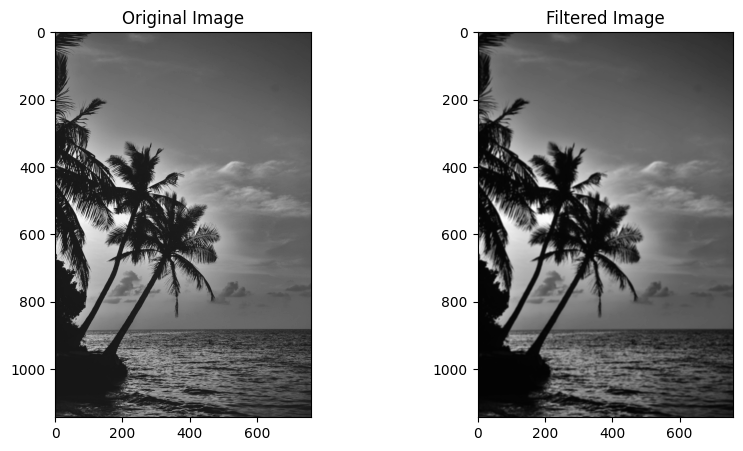

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(filtered_img, cmap='gray'), plt.title('Filtered Image')
plt.show()

## 2. Deteksi Fitur dengan SIFT

In [21]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path,0) #membaca gambar dalam mode grayscale menggunakan OpenCV

Saving Tapety-more-Samsung-10.jpg to Tapety-more-Samsung-10 (1).jpg


In [22]:
sift = cv2.SIFT_create()

In [23]:
keypoints, descriptors = sift.detectAndCompute(img,None)
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

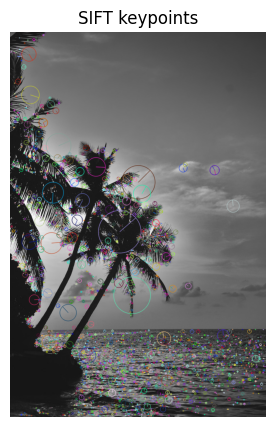

In [24]:
plt.figure(figsize=(10,5))
plt.imshow(img_with_keypoints)
plt.title('SIFT keypoints')
plt.axis('off')
plt.show()

## 3. Representasi Histogram Gambar

In [8]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path) #membaca gambar dalam mode berwarna menggunakan OpenCV

Saving 36081864414_18b19a1cdb_h.jpg to 36081864414_18b19a1cdb_h.jpg


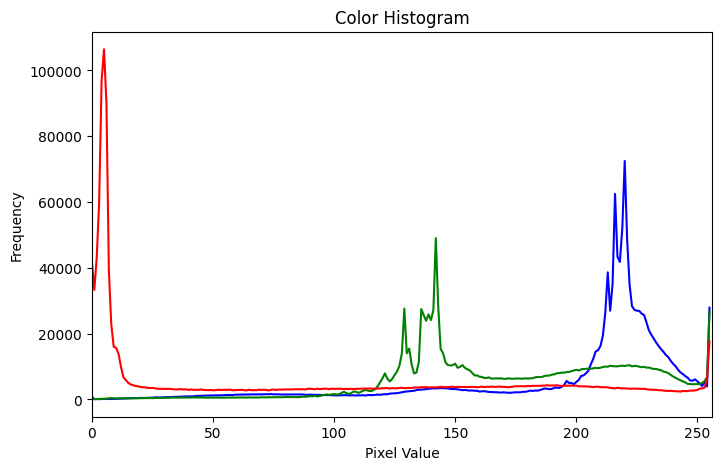

In [9]:
colors = ('b', 'g', 'r') #Mendefinisikan tuple untuk mewakili warna kanal: biru (b), hijau (g), dan merah (r).
plt.figure(figsize=(8, 5)) #Membuat sebuah kanvas untuk plot dengan ukuran 8x5 inci.
for i, color in enumerate(colors): #Memulai loop untuk setiap kanal warna, dengan i sebagai indeks dan color sebagai warna.
    histogram = cv2.calcHist([img], [i], None, [256], [0, 256]) #Menghitung histogram untuk kanal warna ke-i dengan nilai piksel dari 0 hingga 255.
    plt.plot(histogram, color=color) #Memplot histogram untuk kanal warna saat ini dengan warna yang sesuai.
    plt.xlim([0, 256]) #Mengatur batas sumbu x (rentang nilai piksel) dari 0 hingga 256.

plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## 4. Gaussian Smoothing

In [15]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path,0) #membaca gambar dalam mode grayscale menggunakan OpenCV

Saving pexels-alex-qian-1180283-2304917.jpg to pexels-alex-qian-1180283-2304917.jpg


In [22]:
# Terapkan Gaussian blur
gaussian_filtered = cv2.GaussianBlur(img, (15, 15), 1)

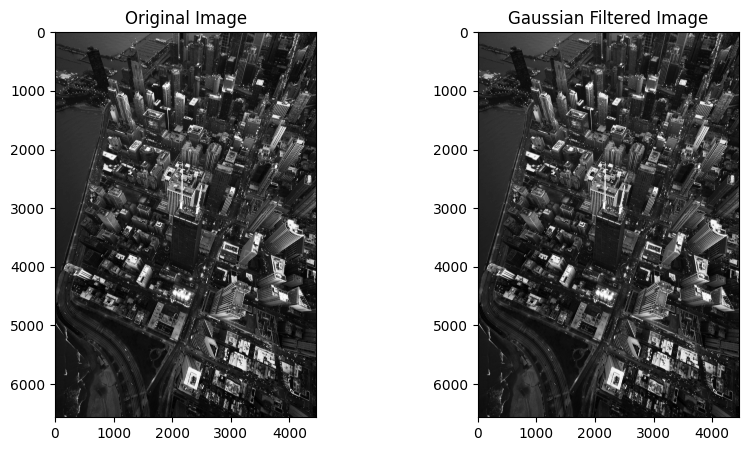

In [23]:
# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title('Gaussian Filtered Image')
plt.show()

## 5. Deteksi Tepi dengan Sobel Filter

In [3]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path,0) #membaca gambar dalam mode grayscale menggunakan OpenCV

Saving 36081864414_18b19a1cdb_h.jpg to 36081864414_18b19a1cdb_h.jpg


In [4]:
# Terapkan Sobel filter
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Tepi horizontal
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Tepi vertikal
sobel_combined = cv2.magnitude(sobel_x, sobel_y)     # Gabungan Sobel

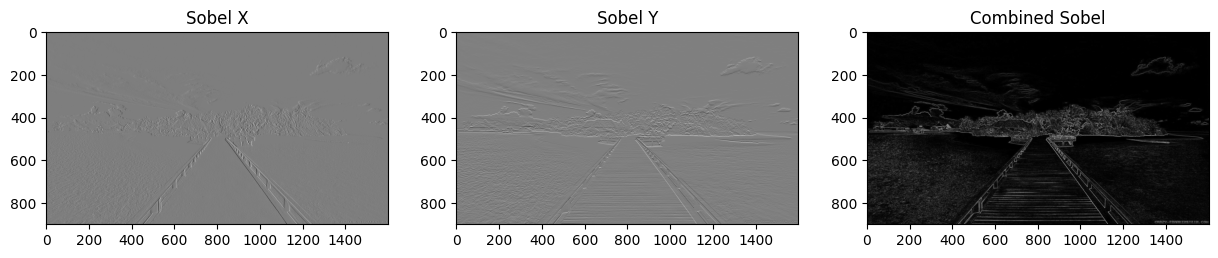

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobel_combined, cmap='gray'), plt.title('Combined Sobel')
plt.show()

## 6. Representasi Fitur dengan Histogram of Oriented Gradients (HOG)

In [7]:
uploaded = files.upload() #mengunggah gambar
img_path = list(uploaded.keys())[0] #mengambil nama file pertama yang diunggah.
img = cv2.imread(img_path,0) #membaca gambar dalam mode grayscale menggunakan OpenCV

Saving Tapety-more-Samsung-10.jpg to Tapety-more-Samsung-10.jpg


In [8]:
# Ekstraksi fitur HOG dengan parameter yang disesuaikan
features, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Normalisasi HOG image dengan scaling manual jika normalisasi default gagal
hog_image_normalized = (hog_image - hog_image.min()) / (hog_image.max() - hog_image.min()) * 255
hog_image_normalized = np.uint8(hog_image_normalized)  # Konversi ke uint8 untuk visualisasi

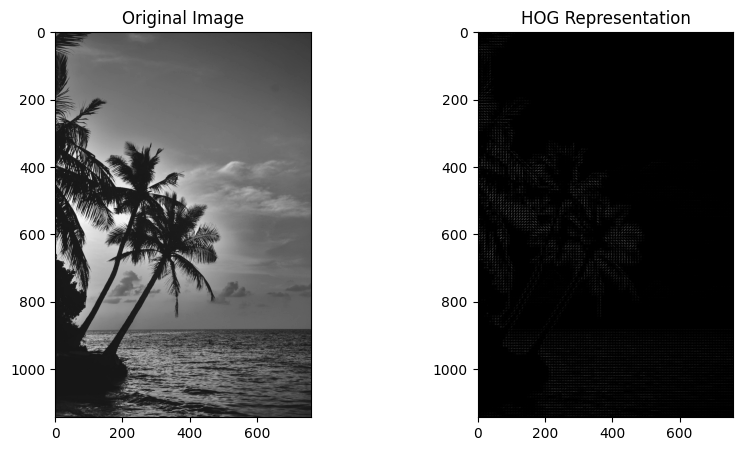

In [9]:
# Tampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(hog_image_normalized, cmap='gray'), plt.title('HOG Representation')
plt.show()